In [77]:
import pandas
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# HD

In [19]:
hd_w_batch = pandas.read_table('all_mRNA_nonzero_norm_counts_trim_firth_C_HD_DE_stdcoeff.txt'
                               ,sep=' '
                               ,index_col=1
                              )
hd_wo_batch = pandas.read_table('../all_mRNA_nonzero_norm_counts_trim_firth_C_HD_DE_stdcoeff.txt'
                                ,sep=' '
                                ,index_col=1
                               )

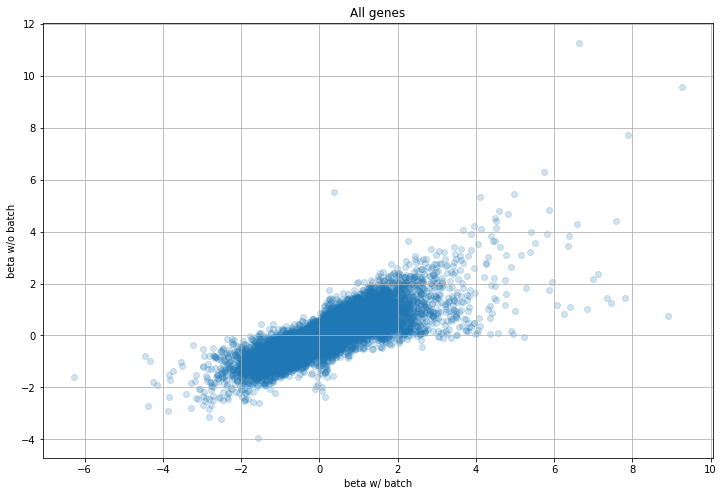

In [20]:
figure(figsize=(12,8))
scatter(hd_w_batch['cnts.beta'],hd_wo_batch['cnts.beta'],alpha=0.2)
xlabel('beta w/ batch')
ylabel('beta w/o batch')
title('All genes')
grid()

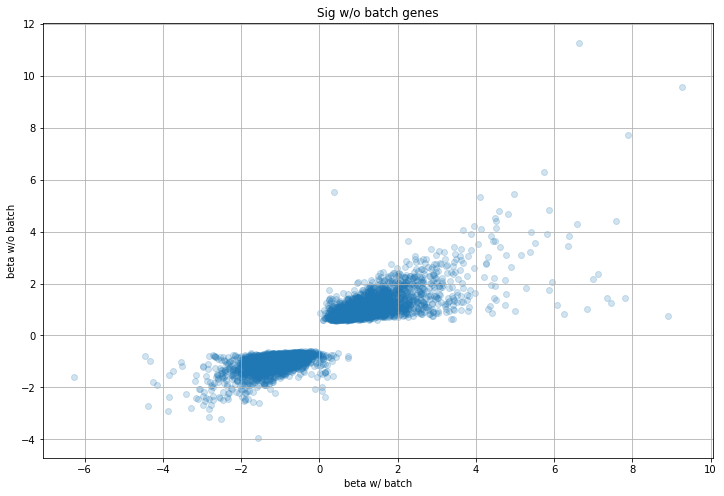

In [105]:
figure(figsize=(12,8))
sig_hd_wo_batch = hd_wo_batch[hd_wo_batch['cnts.padj']<0.05]
sig_hd_w_batch = hd_wo_batch[hd_w_batch['cnts.padj']<0.05]
hd_w_batch_sig_wo_batch = hd_w_batch.loc[sig_hd_wo_batch.index]
scatter(hd_w_batch_sig_wo_batch['cnts.beta'],sig_hd_wo_batch['cnts.beta'],alpha=0.2)
xlabel('beta w/ batch')
ylabel('beta w/o batch')
title('Sig w/o batch genes')
grid()

In [27]:
print(sig_hd_wo_batch.shape)
print(sig_hd_w_batch.shape)
print(len(sig_hd_wo_batch.index.intersection(sig_hd_w_batch.index)))

(4903, 9)
(4073, 9)
2789


In [35]:
from scipy.stats import spearmanr, pearsonr
print('Spearman:',spearmanr(hd_wo_batch['cnts.beta'],hd_w_batch['cnts.beta']))
print('Pearson:',pearsonr(hd_wo_batch['cnts.beta'],hd_w_batch['cnts.beta']))

Spearman: SpearmanrResult(correlation=0.84125538422596247, pvalue=0.0)
Pearson: (0.81602387086549855, 0.0)


In [102]:
hd_wo_batch_sorted = hd_wo_batch.sort_values('cnts.p')
hd_w_batch_sorted = hd_w_batch.sort_values('cnts.p')
hd_gene_ints = []
for i in range(1,hd_wo_batch.shape[0],10) :
    hd_gene_ints.append(hd_wo_batch_sorted.index[:i].intersection(hd_w_batch_sorted.index[:i]).size)

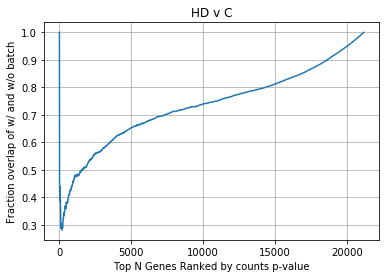

In [114]:
hd_gene_int_fracs = [_1/_2 for _1, _2 in zip(hd_gene_ints,range(1,hd_wo_batch.shape[0],10))]
plot(range(1,hd_wo_batch.shape[0],10),hd_gene_int_fracs)
xlabel('Top N Genes Ranked by counts p-value')
ylabel('Fraction overlap of w/ and w/o batch')
title('HD v C')
grid()

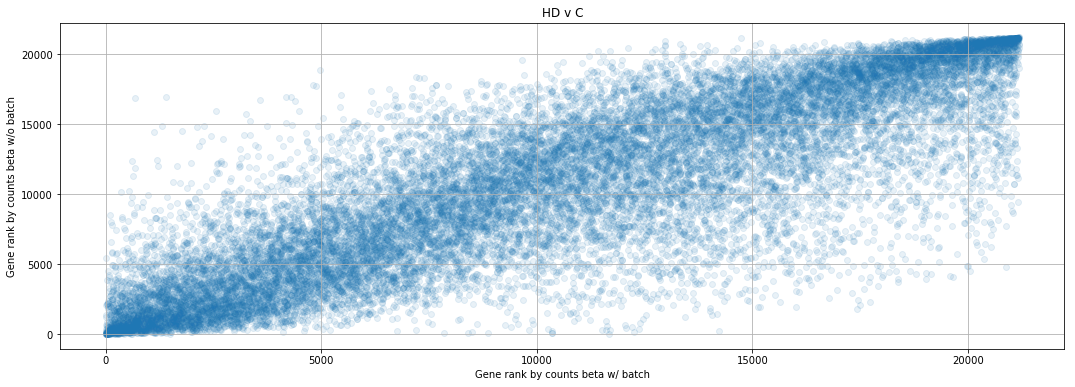

In [120]:
figure(figsize=(18,6))
hwbrnk = hd_w_batch['cnts.beta'].sort_values().rank()
hwobrnk = hd_wo_batch.loc[hwbrnk.index]['cnts.beta'].rank()
scatter(hwbrnk,hwobrnk,alpha=0.1)
xlabel('Gene rank by counts beta w/ batch')
ylabel('Gene rank by counts beta w/o batch')
title('HD v C')
grid()

# PD

In [62]:
pd_w_batch = pandas.read_table('all_mRNA_nonzero_norm_counts_trim_firth_C_PD_DE_stdcoeff.txt'
                               ,sep=' '
                               ,index_col=1
                              )
pd_wo_batch = pandas.read_table('../all_mRNA_nonzero_norm_counts_trim_firth_C_PD_DE_stdcoeff.txt'
                                ,sep=' '
                                ,index_col=1
                               )

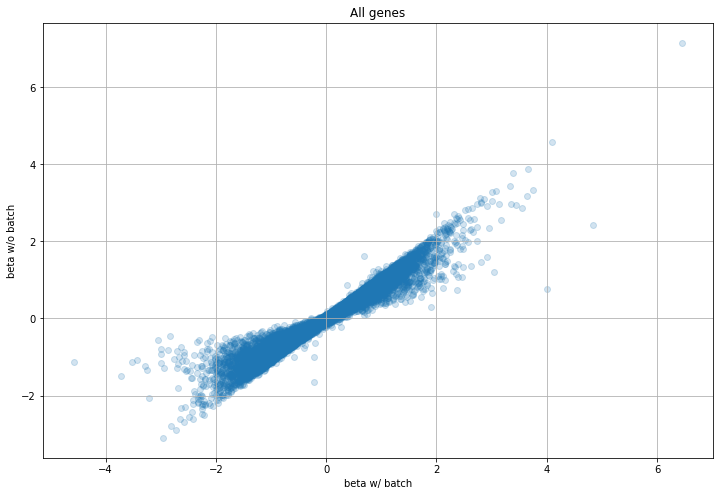

In [64]:
figure(figsize=(12,8))
scatter(pd_w_batch['cnts.beta'],pd_wo_batch['cnts.beta'],alpha=0.2)
xlabel('beta w/ batch')
ylabel('beta w/o batch')
title('All genes')
grid()

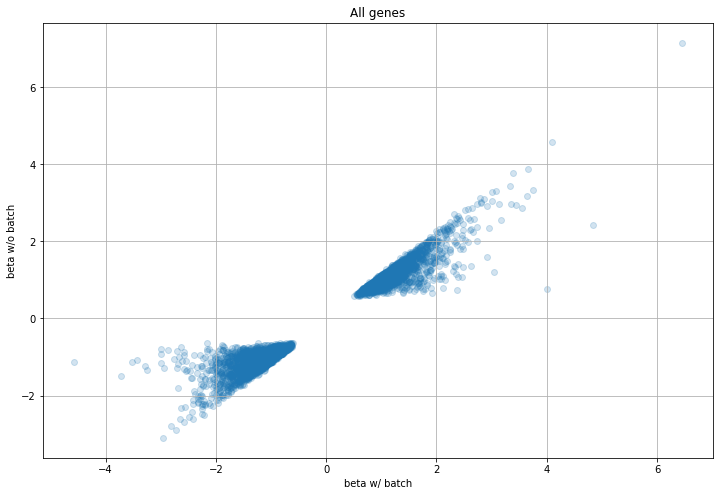

In [66]:
figure(figsize=(12,8))
sig_pd_wo_batch = pd_wo_batch[pd_wo_batch['cnts.padj']<0.05]
sig_pd_w_batch = pd_wo_batch[pd_w_batch['cnts.padj']<0.05]
pd_w_batch_sig_wo_batch = pd_w_batch.loc[sig_pd_wo_batch.index]
scatter(pd_w_batch_sig_wo_batch['cnts.beta'],sig_pd_wo_batch['cnts.beta'],alpha=0.2)
xlabel('beta w/ batch')
ylabel('beta w/o batch')
title('Sig w/o batch genes')
grid()

In [67]:
print(sig_pd_wo_batch.shape)
print(sig_pd_w_batch.shape)
print(len(sig_pd_wo_batch.index.intersection(sig_pd_w_batch.index)))

(4768, 9)
(5026, 9)
4441


In [68]:
from scipy.stats import spearmanr, pearsonr
print('Spearman:',spearmanr(pd_wo_batch['cnts.beta'],pd_w_batch['cnts.beta']))
print('Pearson:',pearsonr(pd_wo_batch['cnts.beta'],pd_w_batch['cnts.beta']))

Spearman: SpearmanrResult(correlation=0.99061753207365211, pvalue=0.0)
Pearson: (0.97143237818085737, 0.0)


In [109]:
pd_wo_batch_sorted = pd_wo_batch.sort_values('cnts.p')
pd_w_batch_sorted = pd_w_batch.sort_values('cnts.p')
pd_gene_ints = []
for i in range(1,pd_wo_batch.shape[0],10) :
    pd_gene_ints.append(pd_wo_batch_sorted.index[:i].intersection(pd_w_batch_sorted.index[:i]).size)

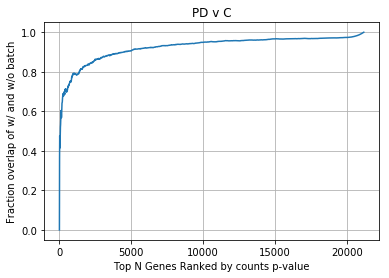

In [115]:
pd_gene_int_fracs = [_1/_2 for _1, _2 in zip(pd_gene_ints,range(1,pd_wo_batch.shape[0],10))]
plot(range(1,pd_wo_batch.shape[0],10),pd_gene_int_fracs)
xlabel('Top N Genes Ranked by counts p-value')
ylabel('Fraction overlap of w/ and w/o batch')
title('PD v C')
grid()

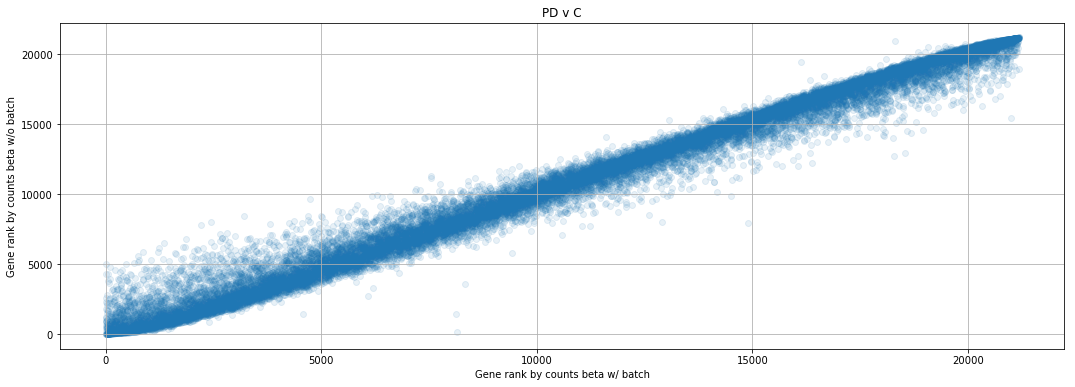

In [119]:
figure(figsize=(18,6))
pwbrnk = pd_w_batch['cnts.beta'].sort_values().rank()
pwobrnk = pd_wo_batch.loc[pwbrnk.index]['cnts.beta'].rank()
scatter(pwbrnk,pwobrnk,alpha=0.1)
xlabel('Gene rank by counts beta w/ batch')
ylabel('Gene rank by counts beta w/o batch')
title('PD v C')
grid()

# ND

In [70]:
nd_w_batch = pandas.read_table('all_mRNA_nonzero_norm_counts_trim_firth_C_ND_DE_stdcoeff.txt'
                               ,sep=' '
                               ,index_col=1
                              )
nd_wo_batch = pandas.read_table('../all_mRNA_nonzero_norm_counts_trim_firth_C_ND_DE_stdcoeff.txt'
                                ,sep=' '
                                ,index_col=1
                               )

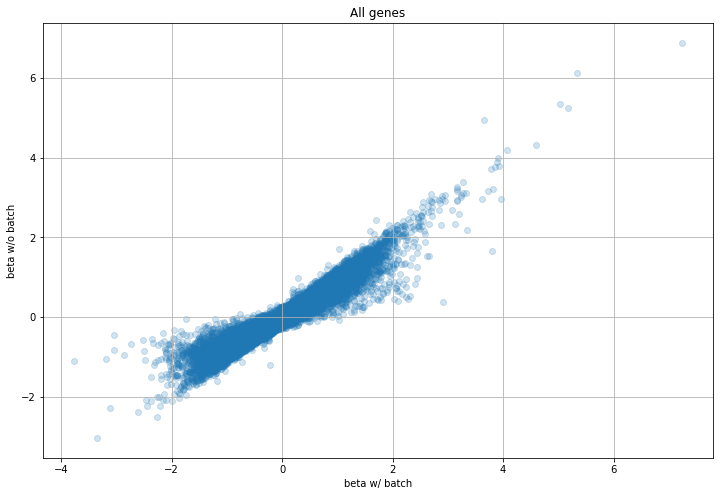

In [71]:
figure(figsize=(12,8))
scatter(nd_w_batch['cnts.beta'],nd_wo_batch['cnts.beta'],alpha=0.2)
xlabel('beta w/ batch')
ylabel('beta w/o batch')
title('All genes')
grid()

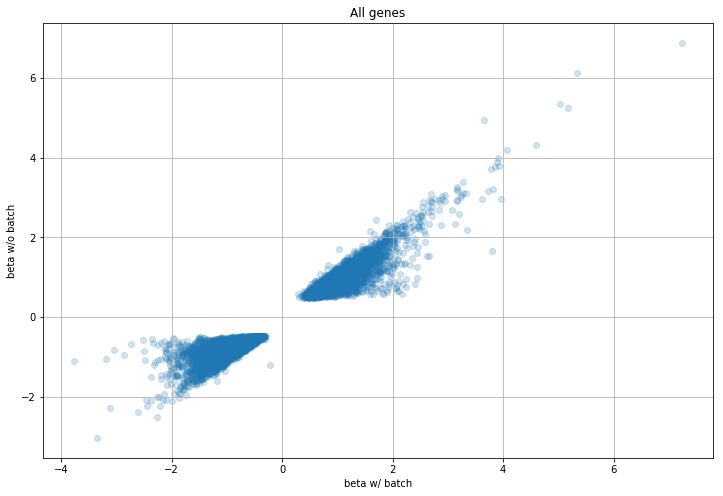

In [72]:
figure(figsize=(12,8))
sig_nd_wo_batch = nd_wo_batch[nd_wo_batch['cnts.padj']<0.05]
sig_nd_w_batch = nd_wo_batch[nd_w_batch['cnts.padj']<0.05]
nd_w_batch_sig_wo_batch = nd_w_batch.loc[sig_nd_wo_batch.index]
scatter(nd_w_batch_sig_wo_batch['cnts.beta'],sig_nd_wo_batch['cnts.beta'],alpha=0.2)
xlabel('beta w/ batch')
ylabel('beta w/o batch')
title('All genes')
grid()

In [73]:
print(sig_nd_wo_batch.shape)
print(sig_nd_w_batch.shape)
print(len(sig_nd_wo_batch.index.intersection(sig_nd_w_batch.index)))

(7541, 9)
(7831, 9)
6737


In [74]:
from scipy.stats import spearmanr, pearsonr
print('Spearman:',spearmanr(nd_wo_batch['cnts.beta'],nd_w_batch['cnts.beta']))
print('Pearson:',pearsonr(nd_wo_batch['cnts.beta'],nd_w_batch['cnts.beta']))

Spearman: SpearmanrResult(correlation=0.97226196716793845, pvalue=0.0)
Pearson: (0.95658570172107038, 0.0)


In [111]:
nd_wo_batch_sorted = nd_wo_batch.sort_values('cnts.p')
nd_w_batch_sorted = nd_w_batch.sort_values('cnts.p')
nd_gene_ints = []
for i in range(1,nd_wo_batch.shape[0],10) :
    nd_gene_ints.append(nd_wo_batch_sorted.index[:i].intersection(nd_w_batch_sorted.index[:i]).size)

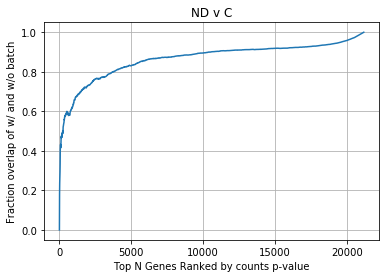

In [116]:
nd_gene_int_fracs = [_1/_2 for _1, _2 in zip(nd_gene_ints,range(1,nd_wo_batch.shape[0],10))]
plot(range(1,nd_wo_batch.shape[0],10),nd_gene_int_fracs)
xlabel('Top N Genes Ranked by counts p-value')
ylabel('Fraction overlap of w/ and w/o batch')
title('ND v C')
grid()

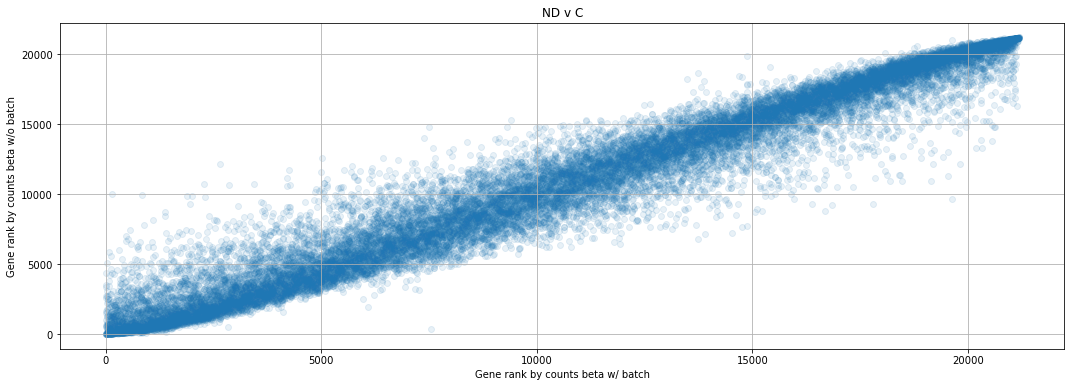

In [118]:
figure(figsize=(18,6))
nwbrnk = nd_w_batch['cnts.beta'].sort_values().rank()
nwobrnk = nd_wo_batch.loc[nwbrnk.index]['cnts.beta'].rank()
scatter(nwbrnk,nwobrnk,alpha=0.1)
xlabel('Gene rank by counts beta w/ batch')
ylabel('Gene rank by counts beta w/o batch')
title('ND v C')
grid()